# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [1]:
import numpy as np

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0.1, 0.3, 0.5] # change here
results = []
# add 1-3 line of code here
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w = w.ravel()
    results.append(w)    

# add 1-3 lines to compare the results
for alpha, result in zip(alphas, results):
    print(f'Result for alpha = {alpha}: w1: {result[:, 0]} w2: {result[:, 1]}')


Result for alpha = 0.1: w1: [[-101.72397081]] w2: [[1.16978757]]
Result for alpha = 0.3: w1: [[-54.23704349]] w2: [[0.90096184]]
Result for alpha = 0.5: w1: [[-36.97522016]] w2: [[0.80324169]]


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [2]:
def sgd(X, y, lr=0.00015, n_iter=10, alpha=0.1):
    X = X.copy()
    X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis=0)) / X[:, 1:].std(axis=0)
    n_samples, n_features = x.shape
    weights = np.zeros((n_features, 1))

    for _ in range(n_iter):
        for _ in range(n_samples):
            i = np.random.randint(0, n_samples)
            x_i = X[i, :].reshape(1, -1)
            y_i = y[i, :].reshape(-1, 1)
            pred = np.dot(x_i, weights)
            error = pred - y_i

            gradient = np.dot(x_i.T, error) + alpha * np.sign(weights)
            gradient[0] = np.dot(x_i.T[0], error)

            weights -= lr * gradient 

    return weights.reshape(-1, 1)


In [3]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 

sgd_result = sgd(x, y, alpha=alpha)
print(f'SGD result: {sgd_result.ravel()}')

lasso_result = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
print(f'Lasso result: {lasso_result.ravel()}')

SGD result: [2.23604076 0.58033432]
Lasso result: [[-101.72397081    1.16978757]]


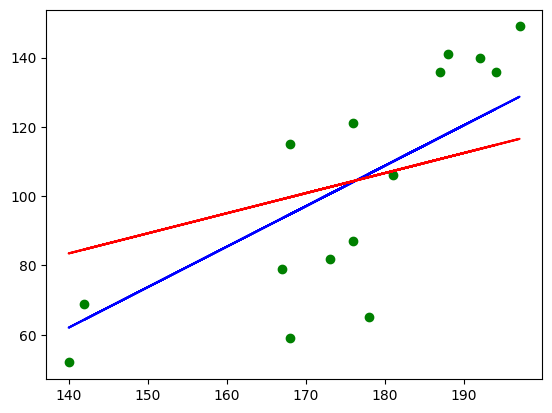

MSE SGD: 659.6322166738045
MSE LASSO: 426.0450770831748


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


x_ = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176])
y_ = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121])
plt.scatter(x_, y_, color='g')
plt.plot(x_, np.dot(x, lasso_result), color='b')
plt.plot(x_, np.dot(x, sgd_result), color='r')
plt.show()


mse_lasso = mean_squared_error(y_, np.asarray(np.dot(x, lasso_result)))
mse_sgd = mean_squared_error(y_, np.asarray(np.dot(x, sgd_result)))

print(f'MSE SGD: {mse_sgd}')
print(f'MSE LASSO: {mse_lasso}')

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df_target = pd.DataFrame(iris_data.target)

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values 
y = iris_df_target.values 

dataset_size = np.size(y)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

y_pred

array([[0.81321925, 1.12768702],
       [0.71494807, 1.08837855],
       [0.75425654, 1.04907007],
       [0.73460231, 1.02941584],
       [0.83287348, 1.10803278],
       [0.89183619, 1.18664972],
       [0.79356501, 1.02941584],
       [0.79356501, 1.10803278],
       [0.69529384, 0.99010737],
       [0.73460231, 1.08837855],
       [0.85252772, 1.18664972],
       [0.79356501, 1.06872431],
       [0.71494807, 1.06872431],
       [0.71494807, 0.97045313],
       [0.91149043, 1.26526666],
       [0.99010737, 1.24561243],
       [0.89183619, 1.18664972],
       [0.81321925, 1.12768702],
       [0.87218196, 1.24561243],
       [0.87218196, 1.12768702],
       [0.79356501, 1.18664972],
       [0.85252772, 1.12768702],
       [0.83287348, 1.02941584],
       [0.77391078, 1.12768702],
       [0.79356501, 1.06872431],
       [0.71494807, 1.10803278],
       [0.79356501, 1.10803278],
       [0.81321925, 1.14734125],
       [0.79356501, 1.14734125],
       [0.75425654, 1.04907007],
       [0.